In [1]:
import numpy as np
from mlcevaluator1 import mlcEvaluator1
from mlcevaluator2 import mlcEvaluator2
from mlctensor import mlcTensor
from sklearn.metrics import multilabel_confusion_matrix


Read true labels and prediction from a file.<br>
There are two sets of predicted labels obtained with different threshold. File *pred_t09.npy* contain predictions obtained with threshold set to $t=0.9$. File *pred_t05.npy* contain predictions obtained with threshold $0.5$. 

In [2]:
# Load GT and prediction from file
gt=np.load('data/posters/gt.npy')
gt.shape

# Uncomment one set of predictions
#
#pred=np.load('data/posters/pred_t05.npy')
pred=np.load('data/posters/pred_t09.npy')
pred.shape

(7209, 18)

## Multi-label Confusion Tensor
Compute raw Multi-Label Confusion Tensor and normalized Recall and Precision Confusion matrices

In [3]:
evalT = mlcTensor(gt, pred)
MT = evalT.computeConfusionTensor(unique=True)
RT = evalT.getRecall()
PT = evalT.getPrecision()

In [4]:
PT.shape

(19, 19)

In [5]:
from utils import show_heatmap
labels=['C0', 'C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'unkn.']

In [6]:
R=RT.diagonal()
P=PT.diagonal()
#print(P)
#print(R)
TP = MT[0,:,:].diagonal()
FN = MT[0,:,:].sum(axis=1)-TP
FP = MT[1,:,:].sum(axis=0)-TP

F1 = 2*TP/(2*TP+FP+FN)

print(' k\t| R(k)\t P(k)\t F1(k)')
print('---------------------------------')
for k in range(R.shape[0]):
    print('%2d\t| %.2f\t %.2f\t| %.2f' %(k, R[k], P[k], F1[k]))

 k	| R(k)	 P(k)	 F1(k)
---------------------------------
 0	| 0.10	 0.14	| 0.12
 1	| 0.06	 0.10	| 0.08
 2	| 0.01	 0.03	| 0.01
 3	| 0.03	 0.05	| 0.04
 4	| 0.31	 0.32	| 0.31
 5	| 0.09	 0.11	| 0.10
 6	| 0.06	 0.08	| 0.07
 7	| 1.00	 0.51	| 0.67
 8	| 0.02	 0.05	| 0.03
 9	| 0.01	 0.02	| 0.02
10	| 0.00	 0.00	| 0.00
11	| 0.06	 0.09	| 0.07
12	| 0.00	 0.00	| 0.00
13	| 0.03	 0.06	| 0.04
14	| 0.15	 0.16	| 0.15
15	| 0.02	 0.06	| 0.03
16	| 0.11	 0.12	| 0.12
17	| 0.01	 0.03	| 0.01
18	| 0.00	 0.00	| 0.00


### Show Recall heatmap

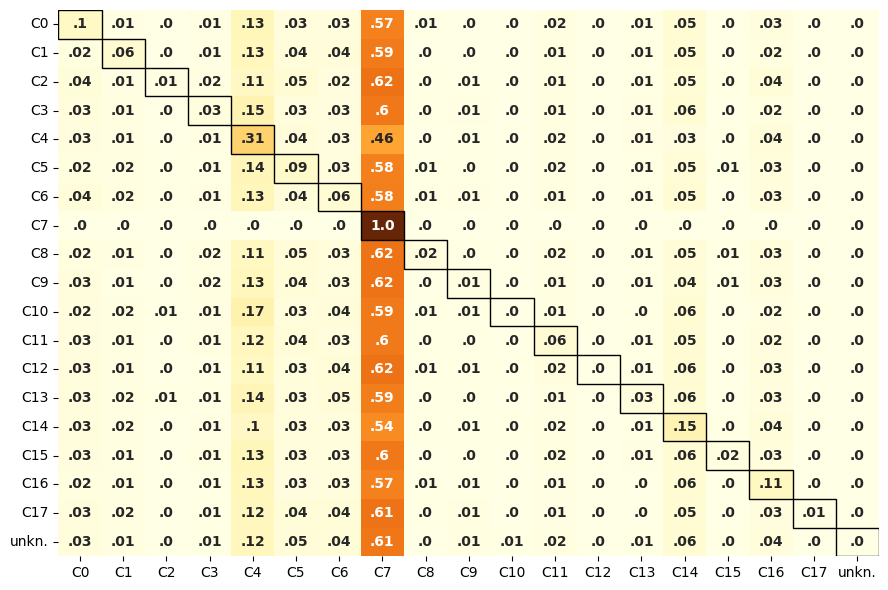

In [7]:
show_heatmap(RT, labels=labels)

### Show Precision heatmap

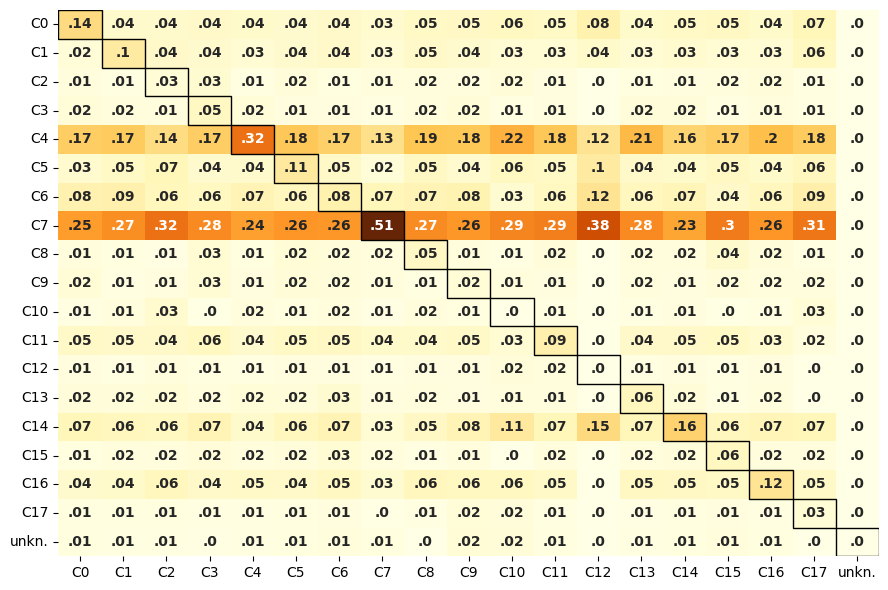

In [8]:
show_heatmap(PT, labels=labels)

## Multi-Label Confusion Matrix, Krstinic et al.
Compute raw Multi-Label Confusion Matrix and normalized Recall and Precision Confusion matrices

In [9]:
evalD = mlcEvaluator1(gt, pred, use_unknown=True)
MD = evalD.computeConfusionMatrix()
RD = evalD.getRowNormalized()
PD = evalD.getColumnNormalized()

### Show Recall heatmap

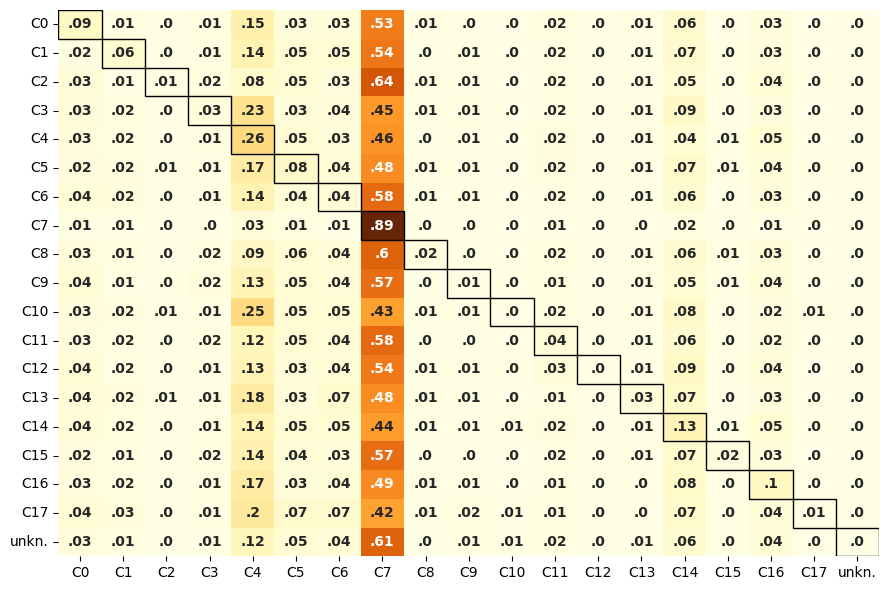

In [10]:
show_heatmap(RD, labels=labels)

### Show Precision heatmap

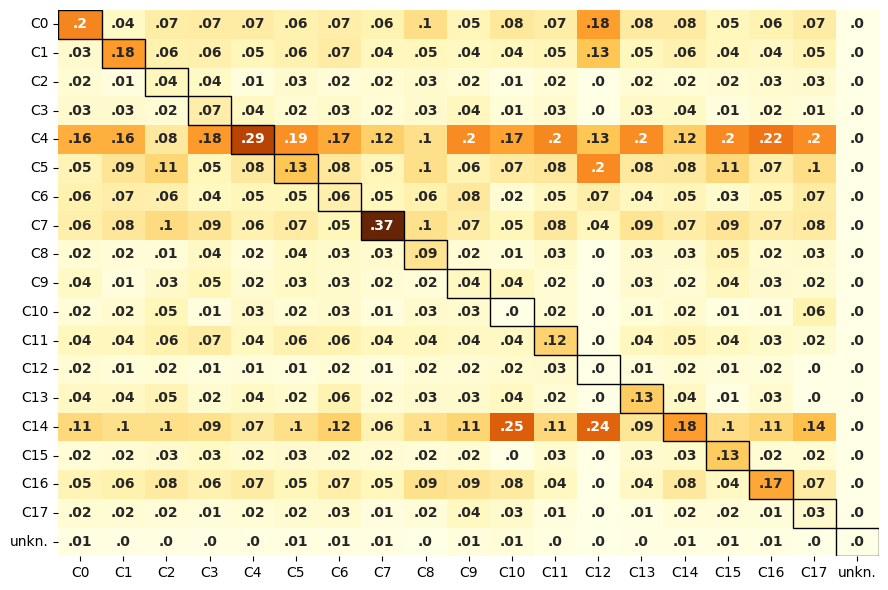

In [11]:
show_heatmap(PD, labels=labels)

## Multi-Label Confusion Matrix, Heydarian et al.

Compute raw Multi-Label Confusion Matrix and normalized Recall and Precision Confusion matrices


In [12]:
evalH = mlcEvaluator2(gt, pred)
MH = evalH.computeConfusionMatrix()
RH = evalH.getRowNormalized()
PH = evalH.getColumnNormalized()

### Show Recall heatmap

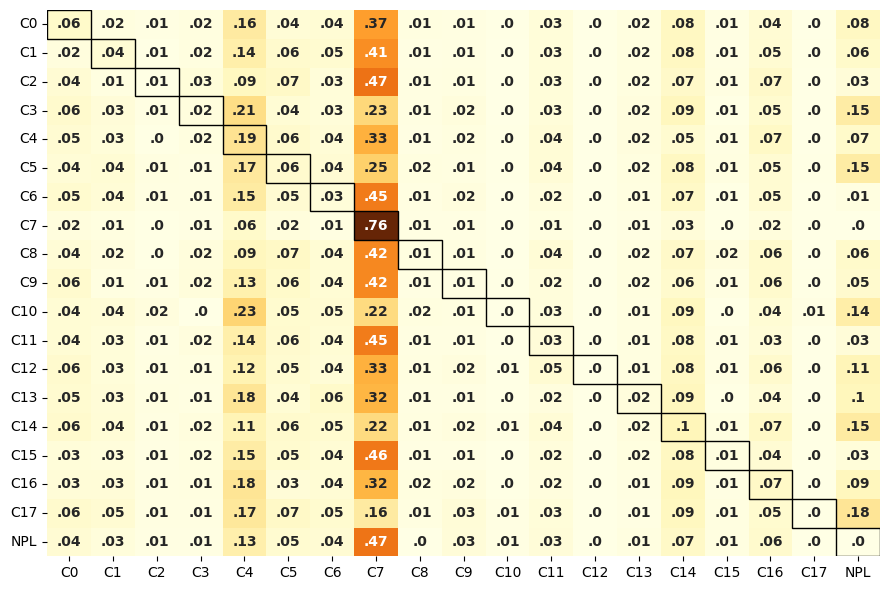

In [13]:
# Set last label to 'NPL' instead of 'unknown'
labels=['C0', 'C1','C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9','C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'NPL']
show_heatmap(RH, labels=labels)

### Show Precision heatmap

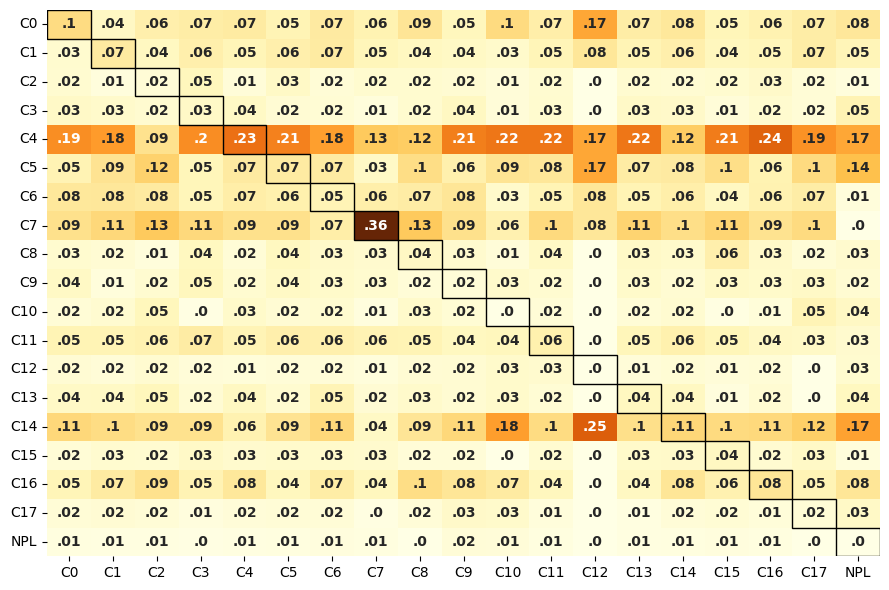

In [14]:
show_heatmap(PH, labels=labels)